<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=10>Data Science and Business Analytics</center></font></h1>
<h1><center>Boosting - Week 2</center></h1>


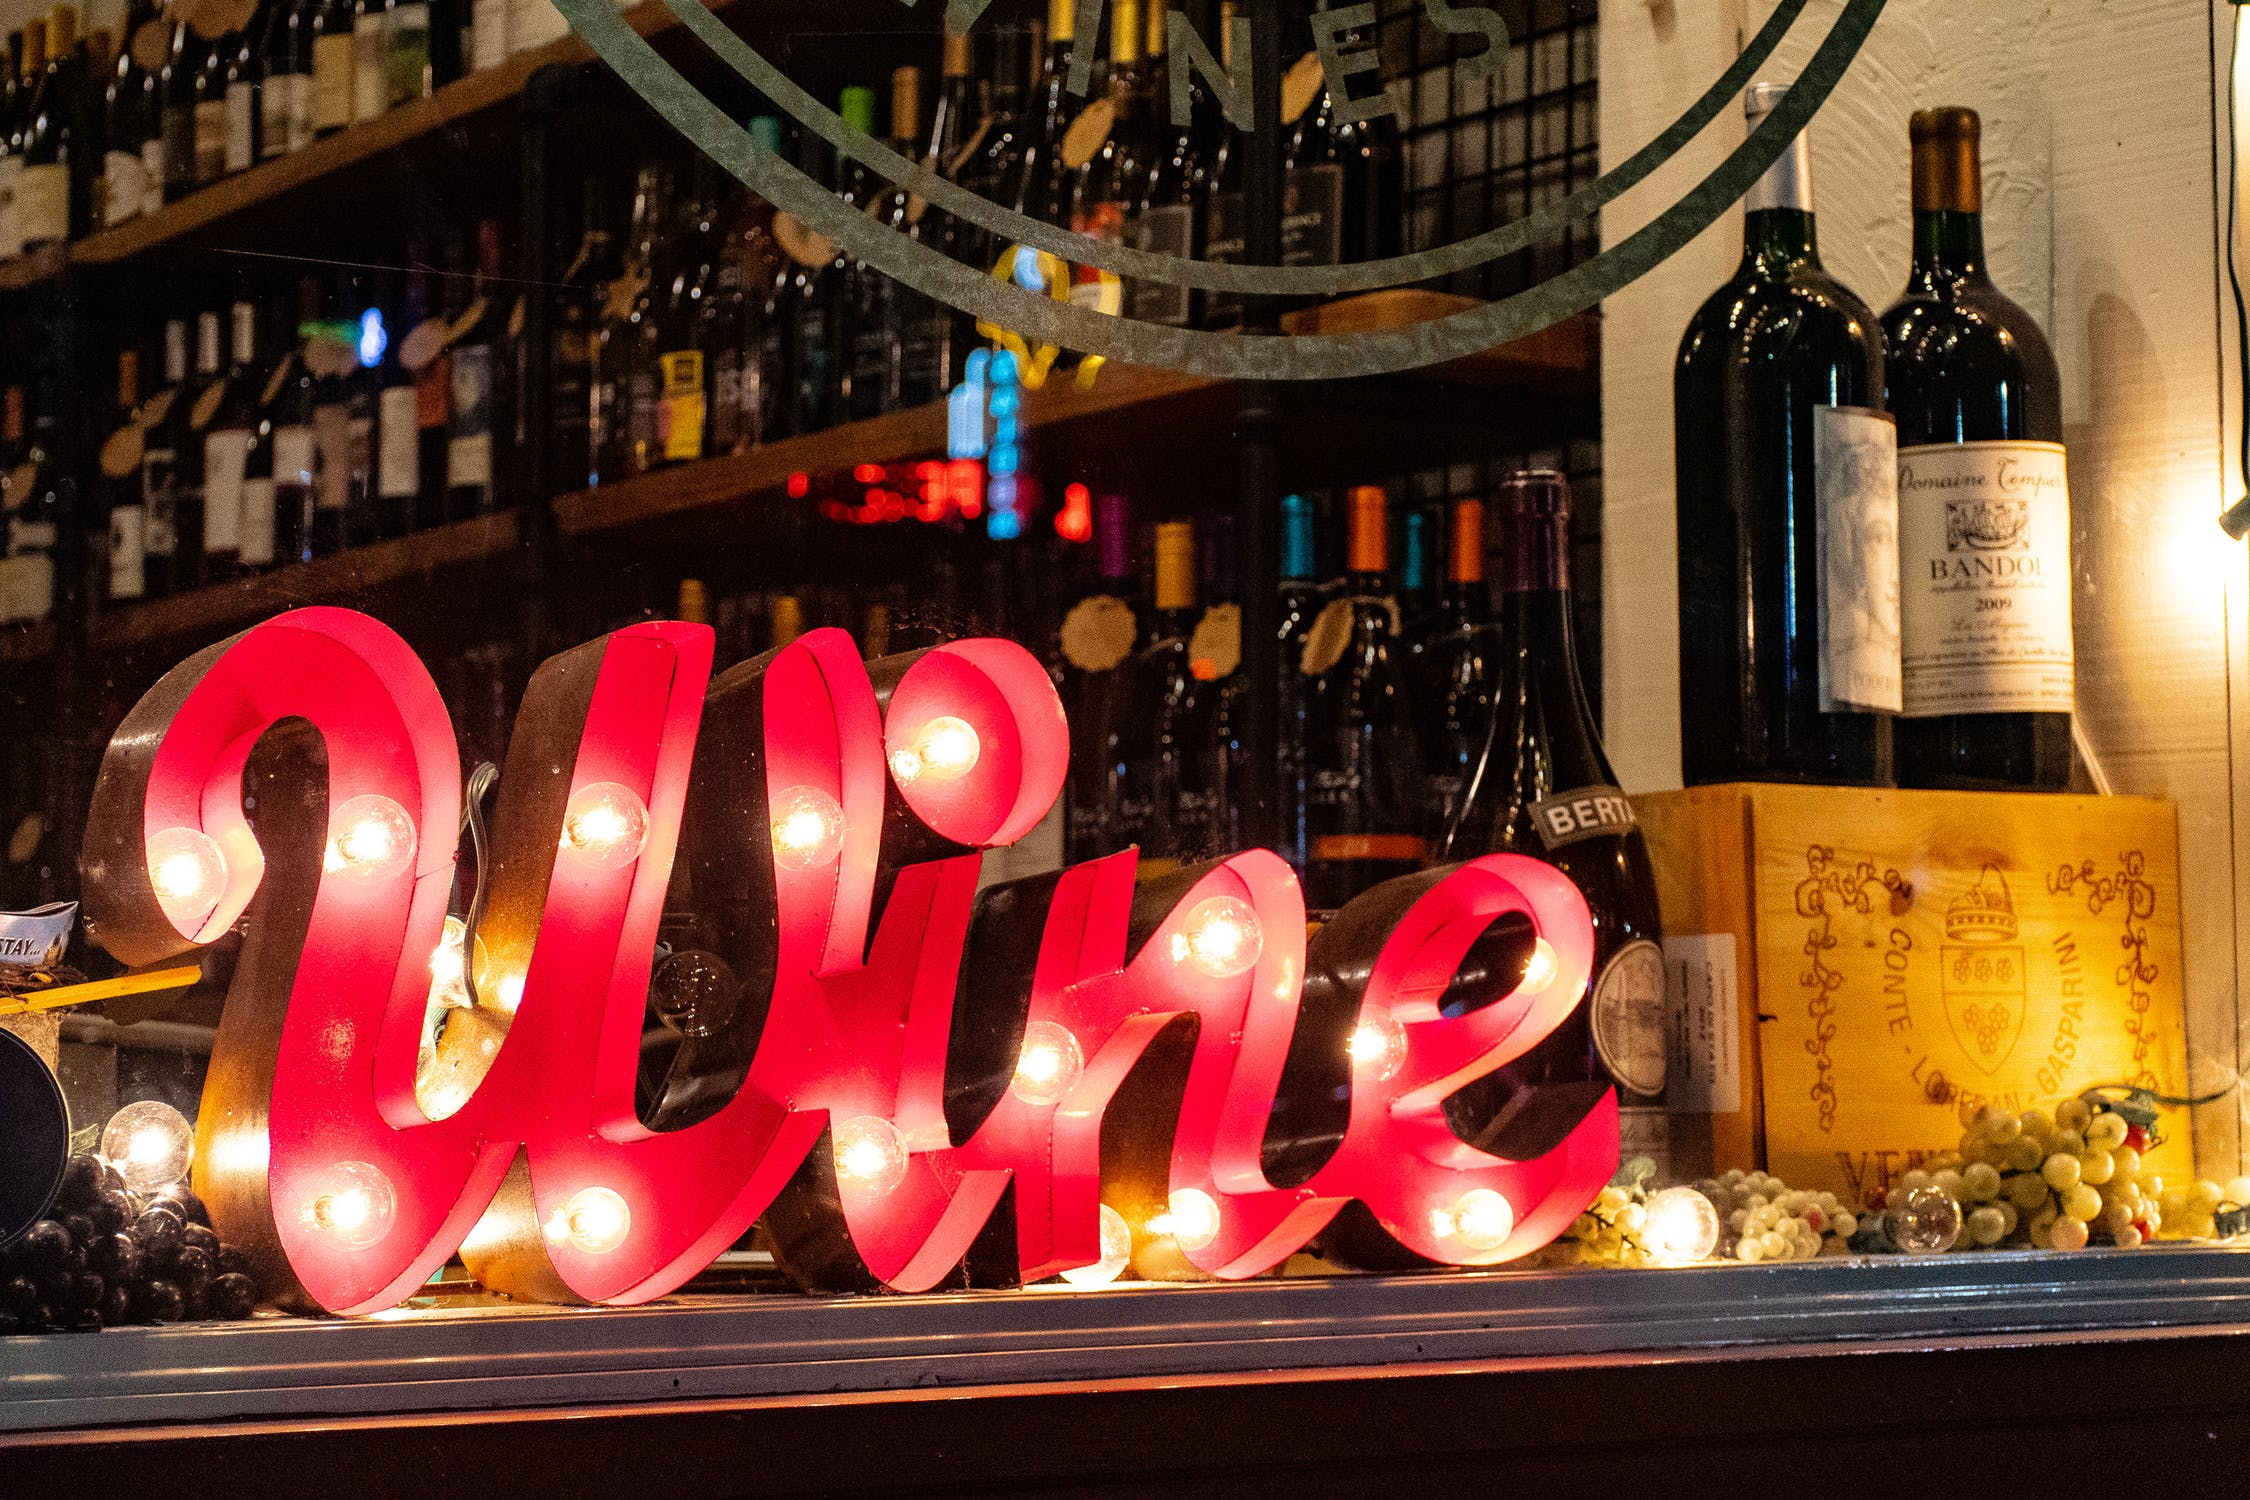

<b><h2><center>Wine Quality Prediction</center></h2></b>

## Problem Statement

### Context

Wine is a beverage made from fermented grapes and other fruit juices with a low amount of alcohol content. Wine is the second most popular alcoholic drink in the world after beer, and it is one of the most highly consumed beverages.

Generally, the quality of wine is graded based on the taste of the wine and vintage but this process is time-consuming, costly, and not efficient as the quality of the wine also depends on other physiochemical attributes like fixed acidity, volatile acidity, etc. Also, it is not always possible to ensure wine quality by experts when there is a huge demand for the product as it will increase the cost significantly.

### Objective:

Moonshine is a red wine company that produces premium high-quality wines. The company wants to improve its production efficiency and reduce the cost and additional time involved in wine tasting. You as a data scientist at Moonshine company have to build a predictive model that can help to identify the premium quality wines using the available data.

### Data Description:

- fixed acidity: Fixed Acidity impart sourness and resist microbial infection, measured in no. of grams of tartaric acid per dm3
- volatile acidity: No. of grams of acetic acid per dm3 of wine. Too high levels can lead to an unpleasant, vinegar-like taste
- citric acid: No. of grams of citric acid per dm3 of wine. Citric acid can add freshness and flavor to wines
- residual sugar: Remaining sugar after fermentation stops, measured in no. of grams per dm3.
- chlorides: No. of grams of sodium chloride i.e. salt per dm3 of wine
- free sulfur dioxide: No. of grams of free sulfite per dm3 of wine
- total sulfur dioxide: No. of grams of total sulfite (free sulphite+ bound) per dm3 of wine
- density: Density in gram per cm3
- pH: Describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic). The pH of the wine can help measure the ripeness of the wine
- sulphates: No. of grams of potassium sulfate per dm3 of wine
- alcohol: Volume of alcohol in percentage
- quality: Wine quality score between 3 to 8

## Import necessary libraries

In [ ]:
# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

## Reading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
wine = pd.read_csv('/content/drive/My Drive/UTA - AIML/Machine_Learning/Essemble/winequality-red.csv',sep=';')

In [ ]:
# copying data to another varaible to avoid any changes to original data
data = wine.copy()

## Overview of the dataset

### Displaying the first and last 5 rows of the dataset

In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


### Understand the shape of the dataset.

In [ ]:
data.shape

(1599, 12)

* There are 1,599 observations and 12 columns in the dataset

### Check the data types of the columns for the dataset.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**Observations-**
* All features are numeric types.
* There are no missing values in the data.

### Summary of the dataset.

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


**Observations-**
* The maximum rating of wine is 8 and the third quartile value is 6 i.e. at least 75% of wines have a rating of 6 or below.
* There might be outliers in data where the wines have high sulfur dioxide (free sulfur dioxide and total sulfur dioxide) content as there is a big difference in the 3rd quartile and maximum values.
* Most wines are on a pH scale between 3 and 4.

## Exploratory Data Analysis

### Univariate analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

#### Observations on fixed acidity

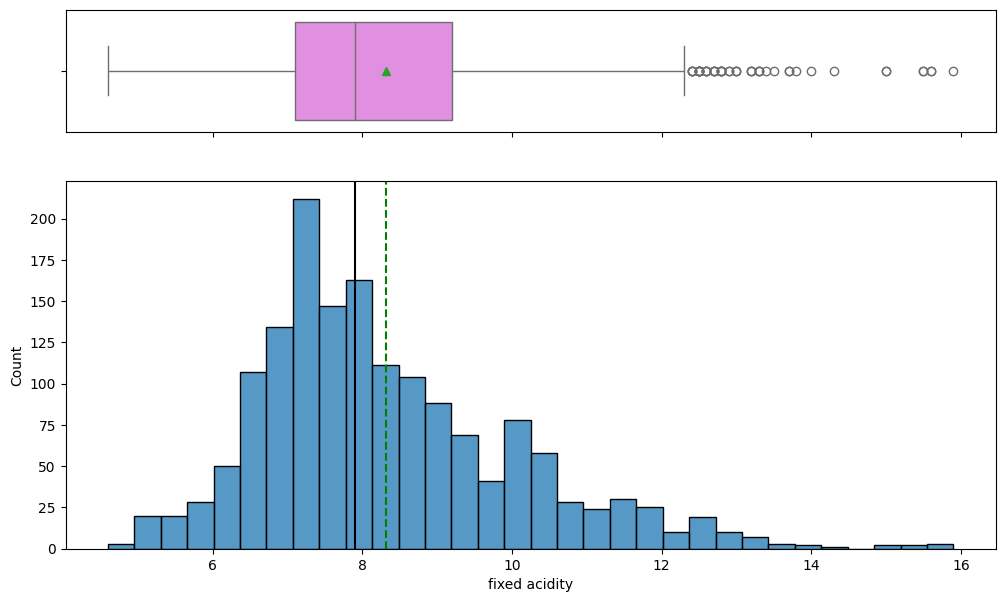

In [ ]:
histogram_boxplot(data,'fixed acidity')

* The distribution is nearly symmetric with some outliers to the right. The mean and median values are close to 8 g/dm^3
* The outliers present to the right indicate some wines have higher acidity than others.

#### Observations on volatile acidity

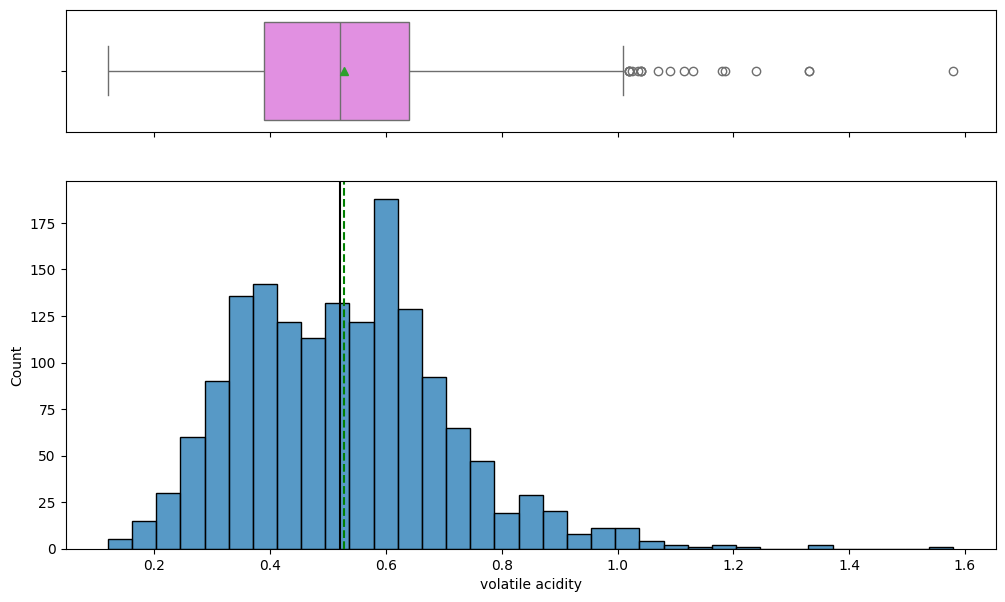

In [ ]:
histogram_boxplot(data,'volatile acidity')

* Volatile acidity has a fairly normal distribution with the mean and median equal to 0.5.
* Some wines have a higher amount of acetic acid that would result in a vinegar-like taste of wine, possibly such wines would be rated lower in quality.

#### Observations on citric acid

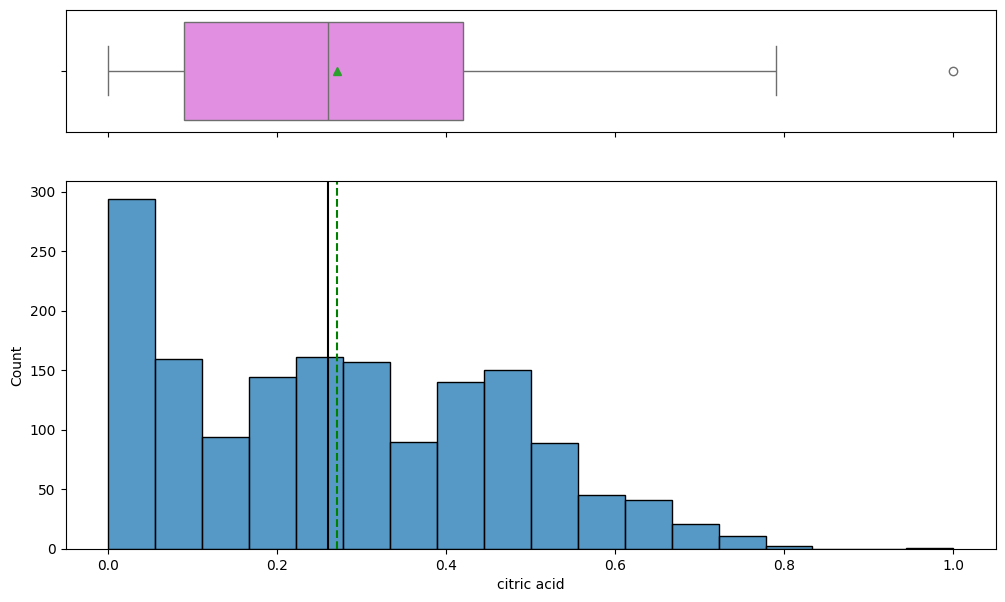

In [ ]:
histogram_boxplot(data,'citric acid')

* Citric acidity has a slightly right-skewed distribution with mean and median equal to 0.25.
* There is one outlier to the right with a high value of citric acid.

#### Observations on residual sugar

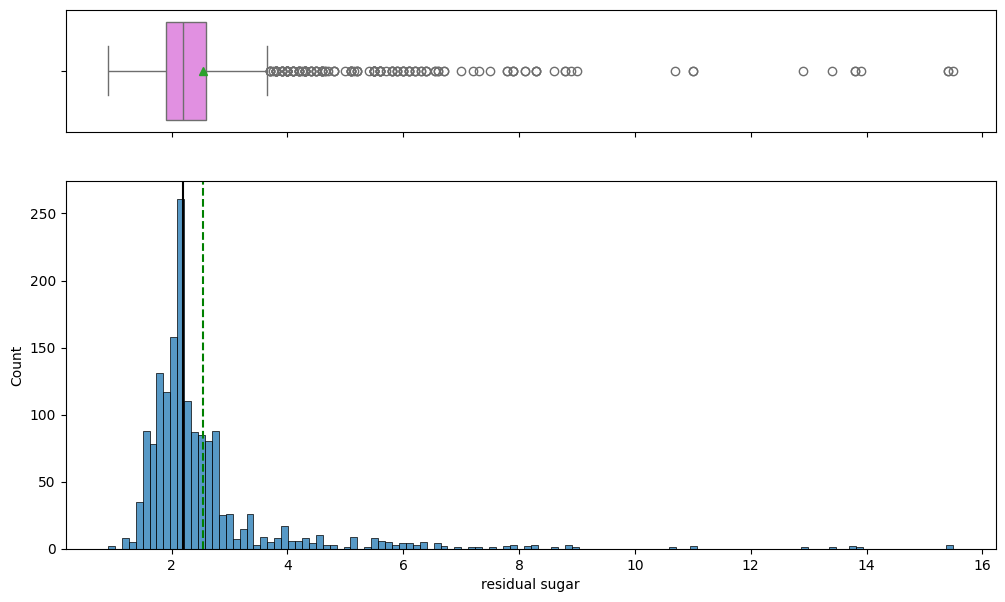

In [ ]:
histogram_boxplot(data,'residual sugar')

* The distribution of the variable is skewed to the right and there are many extreme values.
* Lesser residual sugar wines(< 1) are rare and we can see that majority of wines are concentrated around 1.5 - 2.5 g/dm^3 i.e. most of the wines have normal residual sugar.

#### Observations on chlorides

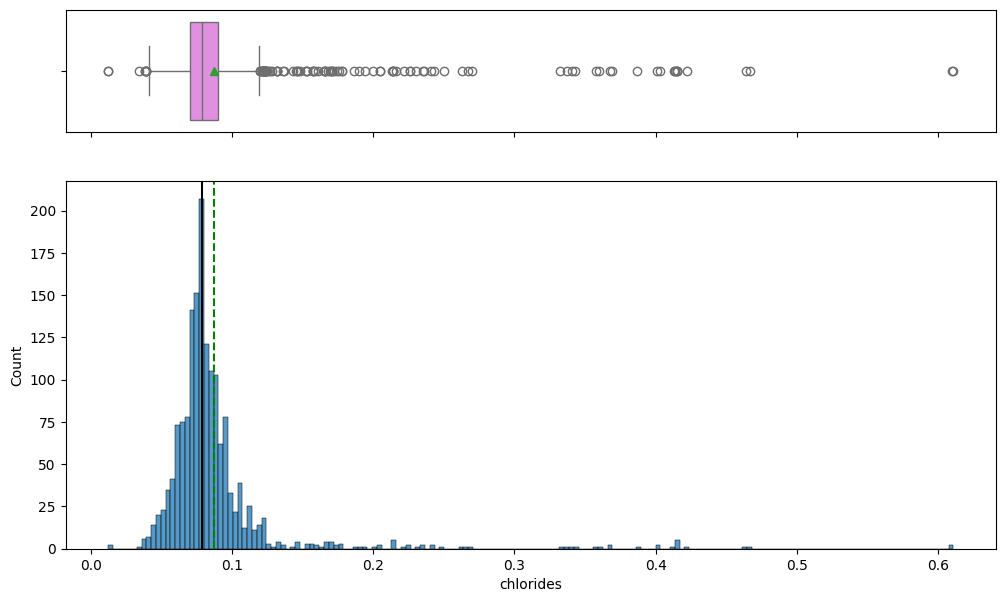

In [ ]:
histogram_boxplot(data,'chlorides')

* chlorides have a bell-shaped curve distribution.
* From boxplot, we can see that there are outliers on both sides of whiskers.

#### Observations on free sulfur dioxide

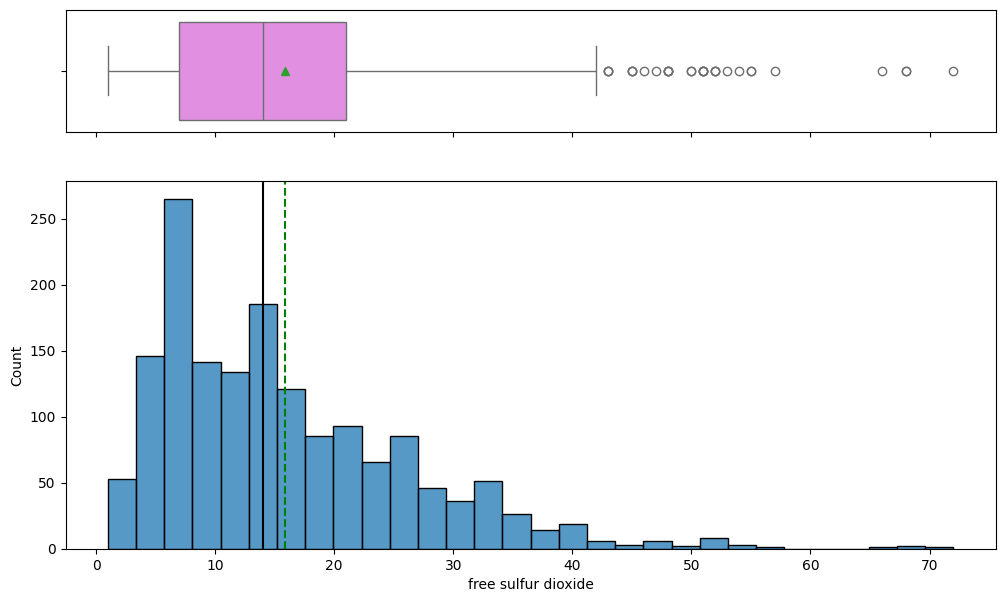

In [ ]:
histogram_boxplot(data,'free sulfur dioxide')

* The distribution of free sulfur dioxide is skewed to the right.
* From the boxplot, we can see that there are outliers - some wines have high free sulfur dioxide concentration.

#### Observations on total sulfur dioxide

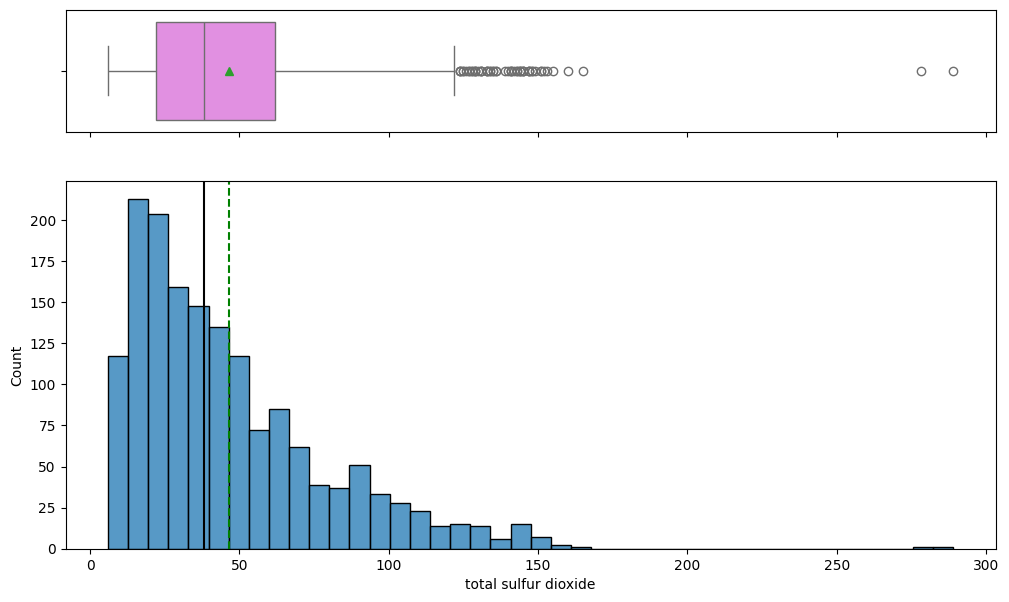

In [ ]:
histogram_boxplot(data,'total sulfur dioxide')

* The distribution of total sulfur dioxide concentration is right-skewed.
* From the boxplot, we can see that there are outliers in these variables having higher total sulfur dioxide concentration than others.
* The two extreme values to the right can be considered as outliers. We can cap these values to the next value.

In [ ]:
#Calculating top 5 values
data['total sulfur dioxide'].sort_values(ascending=False).head()

,total sulfur dioxide
1081,289.0
1079,278.0
354,165.0
1244,160.0
651,155.0


In [ ]:
#Capping the two extreme values
data['total sulfur dioxide']=data['total sulfur dioxide'].clip(upper=165)

#### Observations on density

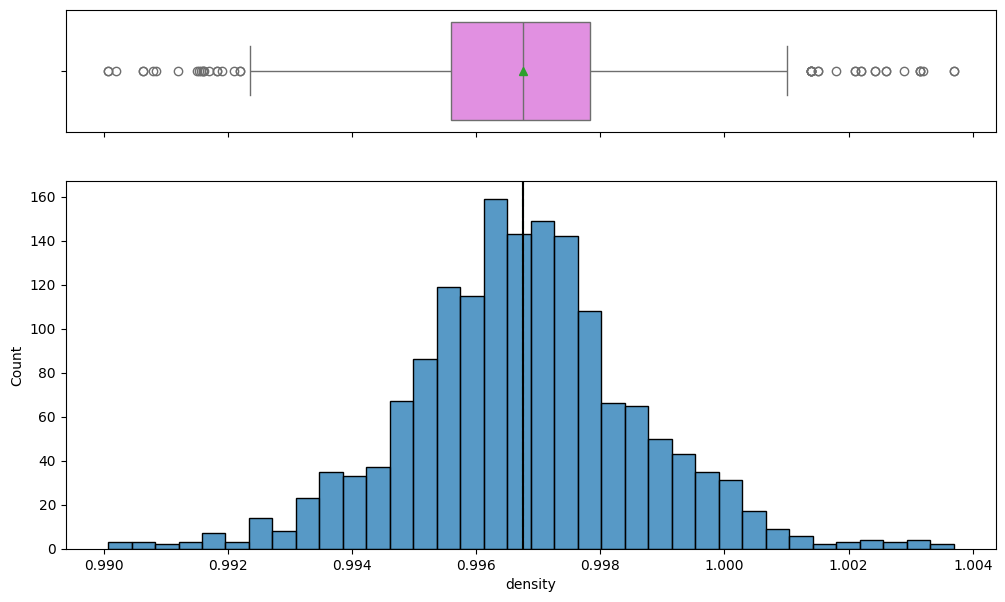

In [ ]:
histogram_boxplot(data,'density')

* The Distribution of density follows a normal distribution with mean and median equal to ~0.997.
* From the boxplot, we can see that there are outliers on both the sides of whiskers indicating some wines are too dense and some very less dense.

#### Observations on pH

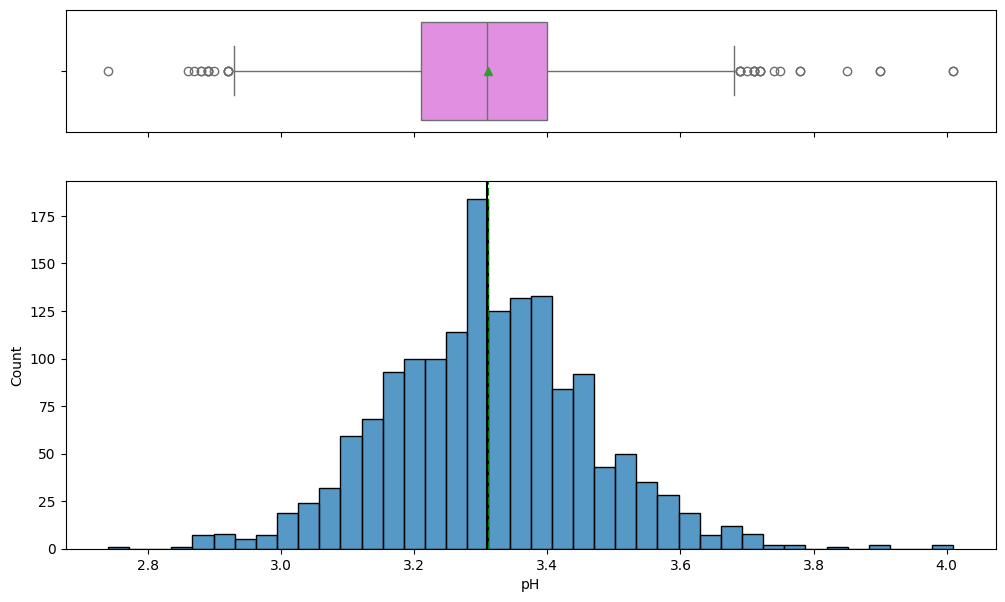

In [ ]:
histogram_boxplot(data,'pH')

* The distribution of pH looks normally distributed with mean and median equal to ~3.3, most wines have a pH value around 3.3 i.e. most wines are acidic.
* From the boxplot, we can see that there are outliers on both sides of whiskers.

#### Observations on sulphates

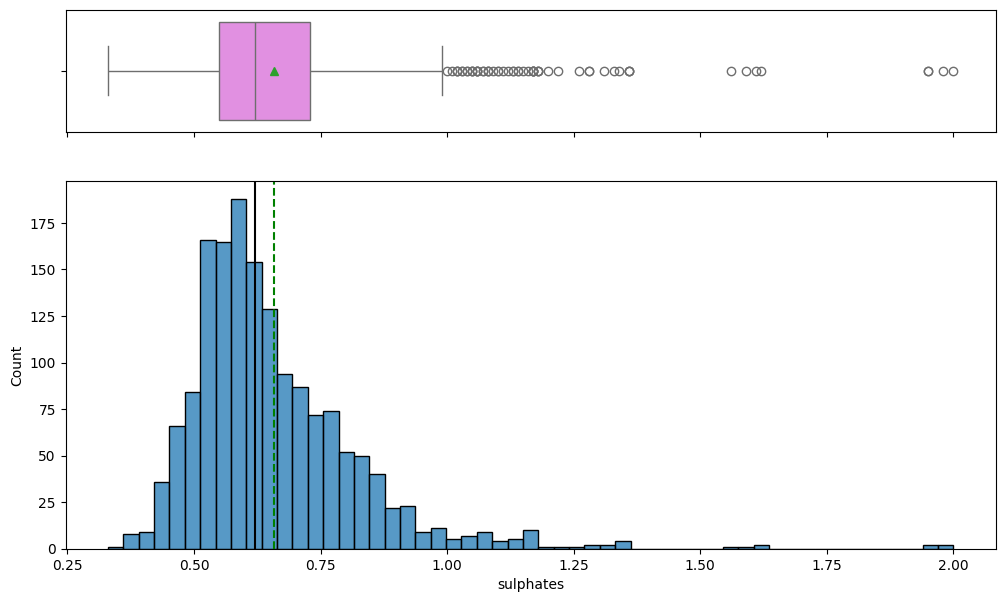

In [ ]:
histogram_boxplot(data,'sulphates')

* The distribution of sulphates, which act as antimicrobial and antioxidant in wines, is right-skewed.
* From the boxplot, we can see that there are outliers in this variable i.e. some wines with very high sulphates than others, can be highly rated wines as sulfates would help them in preserving them for a longer time.

#### Observations on alcohol

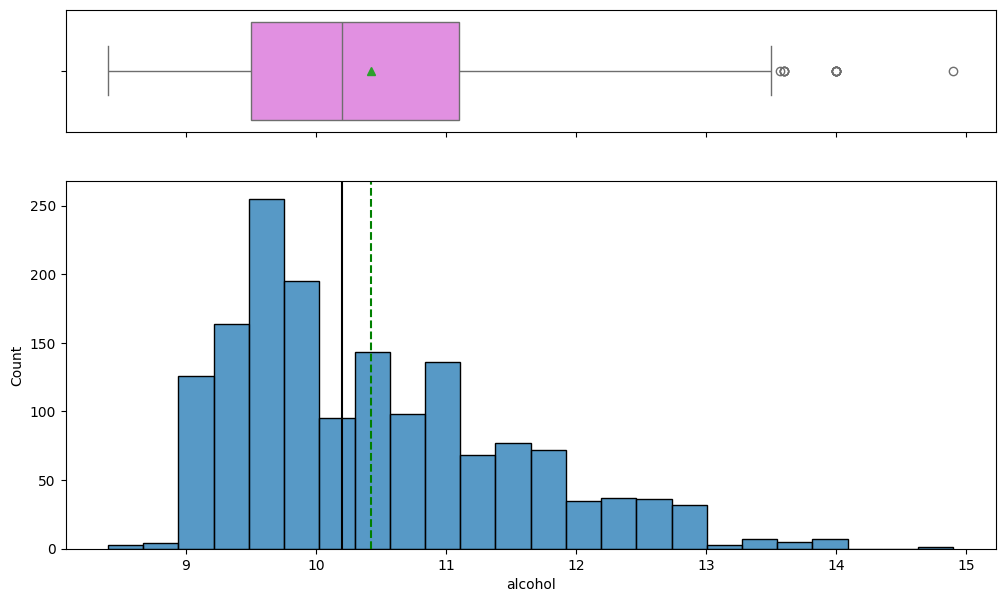

In [ ]:
histogram_boxplot(data,'alcohol')

#### Observations on Quality

* Most wines have 9% to 10% of alcohol.
* From the boxplot, we can see that there are some extreme values for wines having more than 13% of alcohol.

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

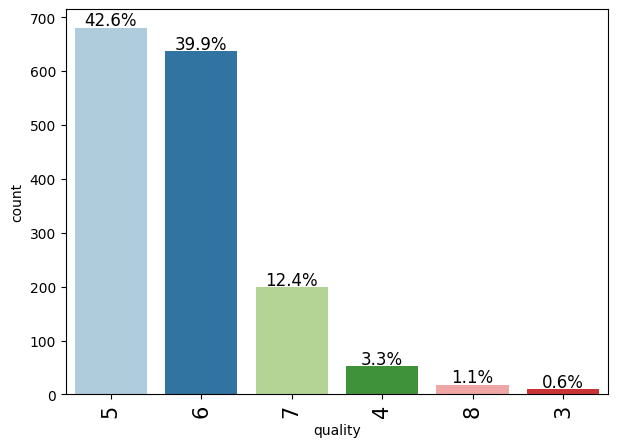

In [ ]:
labeled_barplot(data,"quality",perc=True)

* Most of the wines are rated either 5 or 6 and there are very few records for 3, 4, and 8 rated wines.
* The observations with 7 or 8 are very few. This might be because since these are high-quality premium wines with maximum rating.
* We can combine records to create two broad categories - premium quality wines and non-premium quality wines, where quality:  2-6 can be one class and quality: 7-8 can be the other class.

In [ ]:
# defining bins
bins = (2, 6, 8)
# defining labels
labels = ['non-premium', 'premium']

data['quality_class'] = pd.cut(x = data['quality'], bins = bins, labels = labels)

In [ ]:
data['quality_class'].value_counts()

,count
quality_class,
non-premium,1382
premium,217


* We have reduced the number of categories to only two categories.
* The classes are imbalanced as there are only 217 observations with the premium class.

### Bivariate Analysis

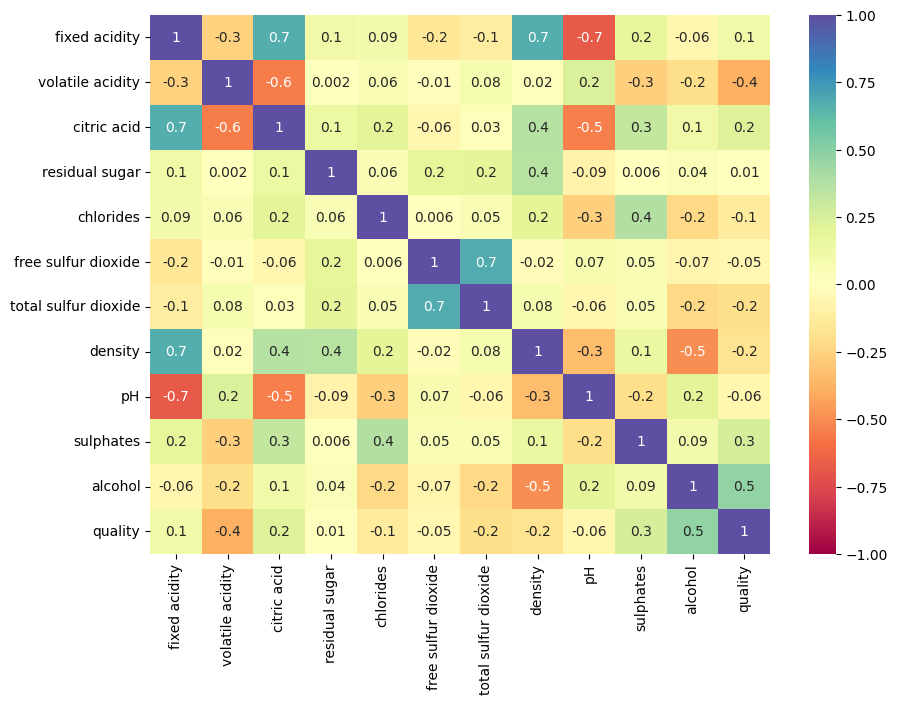

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(data.drop('quality_class',axis=1).corr(),annot=True,vmin=-1,vmax=1,fmt='.1g',cmap="Spectral")
plt.show()

* Fixed acidity has a strong positive correlation with citric acid and density.
* The total sulfur dioxide and free sulfur dioxide have a strong correlation.
* The quality of wine shows a moderate correlation with alcohol.

In [ ]:
sns.pairplot(data,hue='quality_class')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

* There is overlap in the distribution of variables for both classes. Let's explore this further using other plots.

#### Quality vs acidity

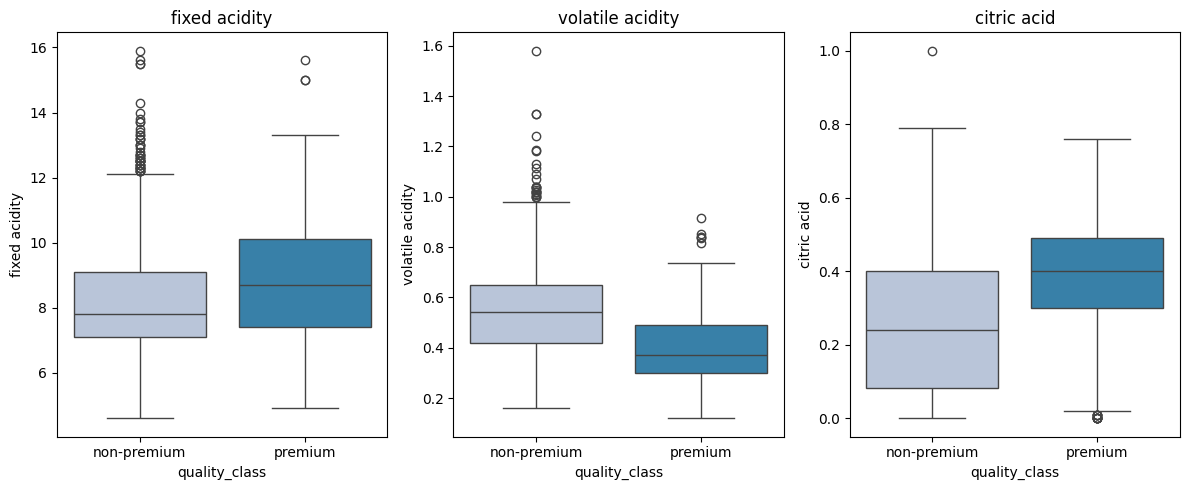

In [ ]:
cols = data[['fixed acidity', 'volatile acidity', 'citric acid']].columns.tolist()
plt.figure(figsize=(12,5))

for i, variable in enumerate(cols):
                     plt.subplot(1,3,i+1)
                     sns.boxplot(data=data,x='quality_class',y=variable,palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

* Premium wines have higher fixed acidity and citric acid and lower volatile acidity.

#### Quality vs sulfur

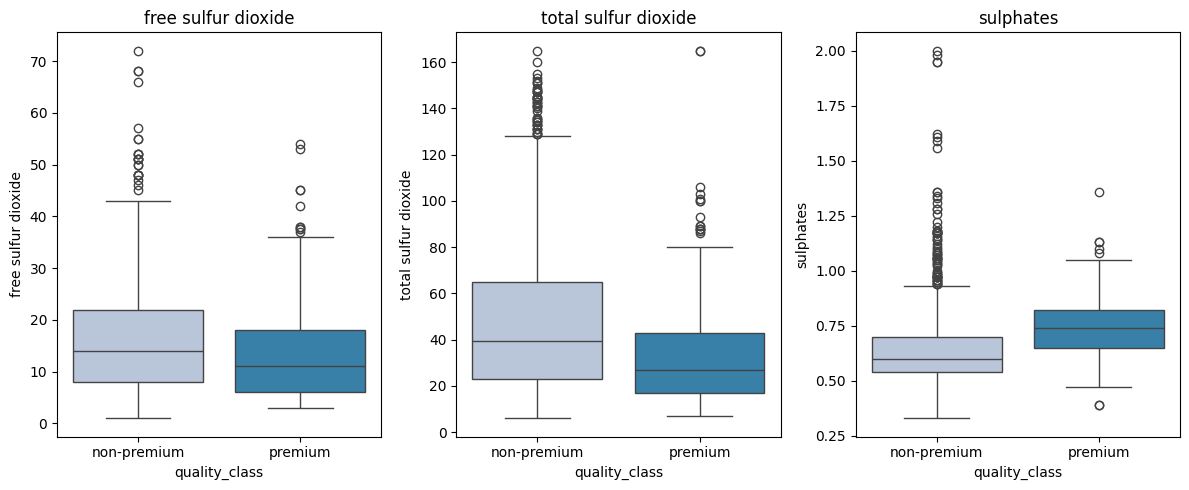

In [ ]:
cols = data[['free sulfur dioxide', 'total sulfur dioxide', 'sulphates']].columns.tolist()
plt.figure(figsize=(12,5))

for i, variable in enumerate(cols):
                     plt.subplot(1,3,i+1)
                     sns.boxplot(data=data,x='quality_class',y=variable,palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

* Premium wines have less concentration of free sulfur dioxide and total sulfur dioxide but higher suofates that helps in preserving them for a longer period.

#### Quality vs chlorides

In [ ]:
## function to plot boxplots w.rt quality
def boxplot(x):
    plt.figure(figsize=(7,5))
    sns.boxplot(data=data,x=x,y=data['quality_class'],palette="PuBu")
    plt.show()

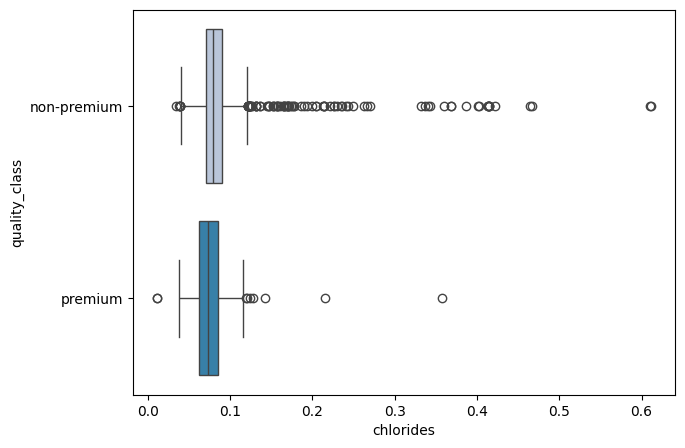

In [ ]:
boxplot(data['chlorides'])

* There's not much difference between the chlorides for both classes.
* There are many outliers for the non-premium wines. It is quite difficult to interpret here, let's turn off the outliers and visualize again.

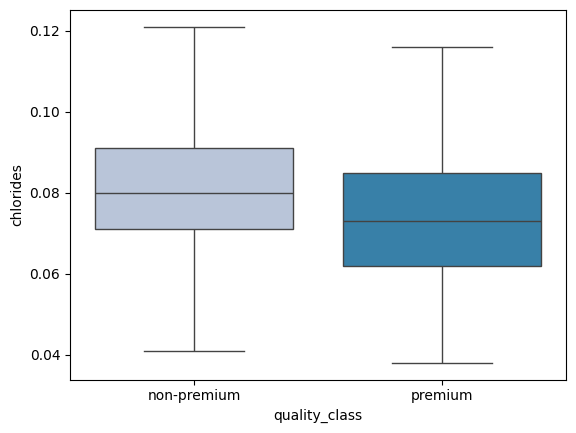

In [ ]:
sns.boxplot(data=data,x='quality_class',y='chlorides',showfliers=False,palette='PuBu');

* Premium wines have a lower concentration of chlorides in them.

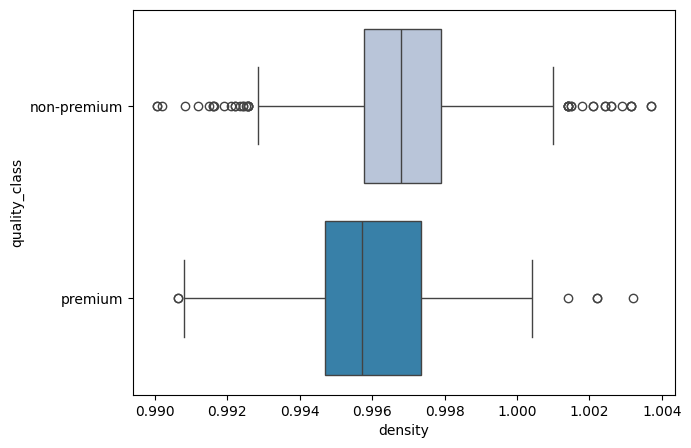

In [ ]:
boxplot(data['density'])

* Premium wines have lesser density i.e. they have comparatively thinner than the non-premium wines.

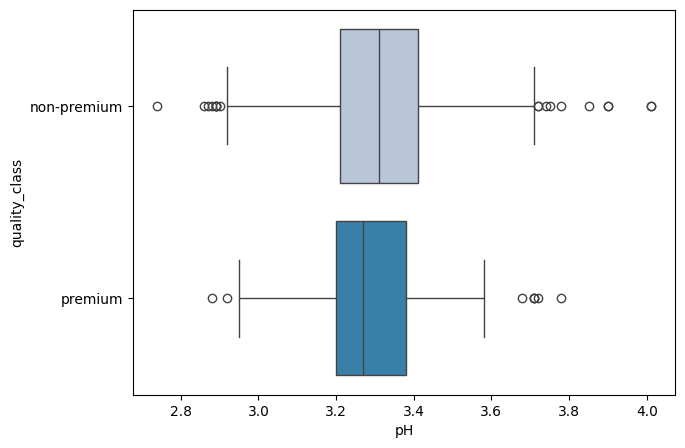

In [ ]:
boxplot(data['pH'])

* There is not much difference between the pH value of both types of wines but the range of pH value of non-premium wines is higher than the range of pH value of premium wines. This indicates that some non-premium wines are either too acidic or less acidic.

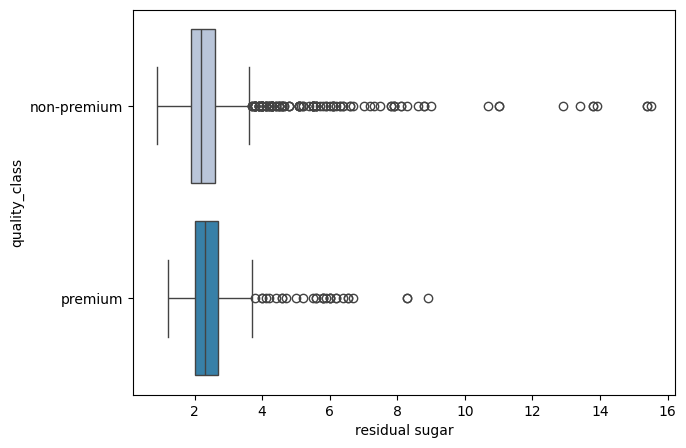

In [ ]:
boxplot(data['residual sugar'])

* As we observed earlier some wines have high residual sugar, such wines are rated lower.

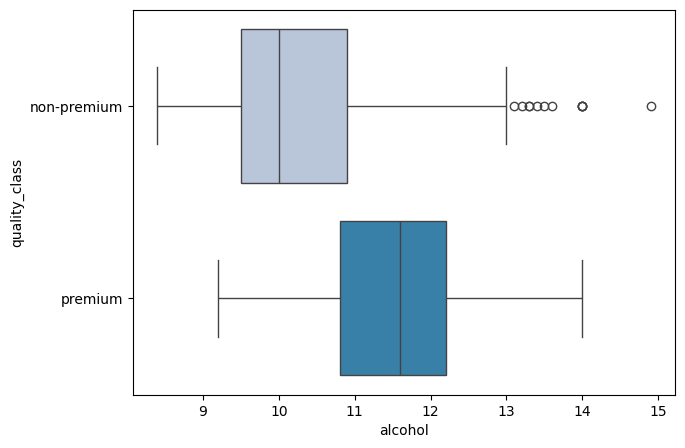

In [ ]:
boxplot(data['alcohol'])

* Alcohol content plays a huge role in wine quality. We can see that premium wines have a higher alcohol content as compared to non-premium wines.

## Data Preprocessing

### Data Preparation for Modeling

In [ ]:
data.drop('quality', axis=1, inplace=True)
X = data.drop('quality_class', axis=1)
y = data['quality_class'].apply(lambda x : 0 if x=='non-premium' else 1 )

In [ ]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.30, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(1119, 11) (480, 11)


**Note**: The stratify argument maintains the original distribution of classes in the target variable while splitting the data into train and test sets.

In [ ]:
y.value_counts(1)

,proportion
quality_class,
0,0.86429
1,0.13571


In [ ]:
y_test.value_counts(1)

,proportion
quality_class,
0,0.864583
1,0.135417


## Model evaluation criterion


**The model can make wrong predictions as:**
1. Predicting a wine is of premium quality when it is of non-premium quality.
2. Predicting a wine is of non-premium quality when it is of premium quality.

**Which case is more important? **
1. If the model predicts a wine is of non-premium quality but it is of premium quality then the company would incur the loss of good wine and resources used.
2. If the model predicts a wine is of premium quality but it is not then the company would roll out low-quality wine which would affect their customer base and their reputation.

**Which metric to optimize?**
* We would want F1-Score to be maximized, the greater the F1-Score higher the chances of predicting both the classes correctly.

**Let's define a function to provide metric scores on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Decision Tree - Model Building and Hyperparameter Tuning

### Decision Tree

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy  Recall  Precision        F1
0    0.8875     0.6    0.58209  0.590909


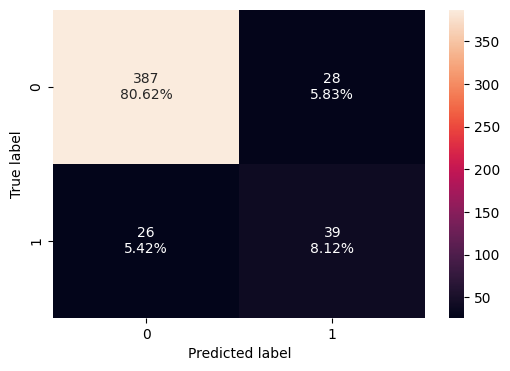

In [ ]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
d_tree_model_train_perf=model_performance_classification_sklearn(d_tree,X_train,y_train)
print("Training performance:\n",d_tree_model_train_perf)
d_tree_model_test_perf=model_performance_classification_sklearn(d_tree,X_test,y_test)
print("Testing performance:\n",d_tree_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(d_tree,X_test,y_test)

* The decision tree is overfitting the training data.
* Let's try hyperparameter tuning and see if the model performance improves.

### Hyperparameter Tuning

In [ ]:
#Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.18,1:0.72},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30),
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.18, 1: 0.72}, max_depth=np.int64(4),
                       max_leaf_nodes=15, min_impurity_decrease=0.0001,
                       min_samples_leaf=10, random_state=1)

Training performance:
    Accuracy    Recall  Precision   F1
0  0.853441  0.809211   0.476744  0.6
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.789583  0.707692   0.359375  0.476684


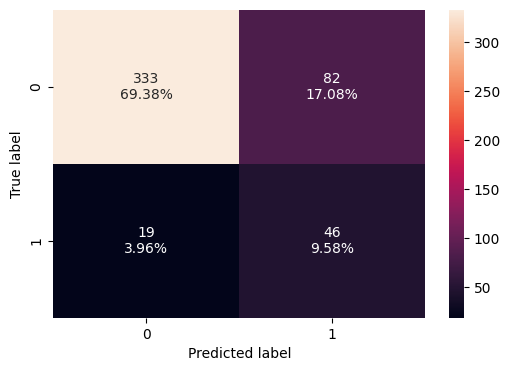

In [ ]:
#Calculating different metrics
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator,X_train,y_train)
print("Training performance:\n",dtree_estimator_model_train_perf)
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator,X_test,y_test)
print("Testing performance:\n",dtree_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(dtree_estimator,X_test,y_test)

* The overfitting has reduced but the test f1-score has also decreased.
* Let's try some other models.

## Bagging - Model Building and Hyperparameter Tuning

### Random Forest Classifier

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0   0.91875  0.492308   0.842105  0.621359


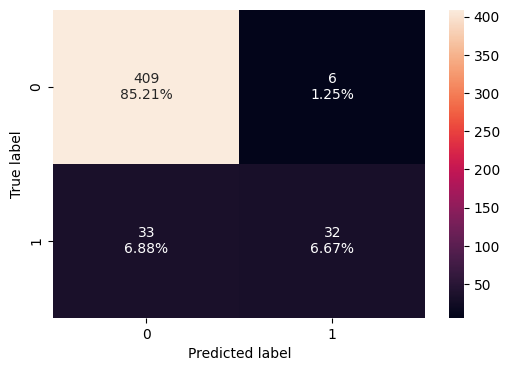

In [ ]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator,X_train,y_train)
print("Training performance:\n",rf_estimator_model_train_perf)
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator,X_test,y_test)
print("Testing performance:\n",rf_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator,X_test,y_test)

* Random forest is giving a slightly higher test f1-score than decision trees but it is overfitting the training data.
* Let's try hyperparameter tuning and see if the model performance improves.

### Hyperparameter Tuning

In [ ]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(class_weight={0:0.18,1:0.82},random_state=1,oob_score=True,bootstrap=True)

parameters = {
                'max_depth': list(np.arange(5,30,5)) + [None],
                'max_features': ['sqrt','log2',None],
                'min_samples_leaf': np.arange(1,15,5),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(10,110,10)}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.18, 1: 0.82}, max_depth=np.int64(10),
                       min_samples_leaf=np.int64(6),
                       min_samples_split=np.int64(17),
                       n_estimators=np.int64(40), oob_score=True,
                       random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.935657  0.881579   0.712766  0.788235
Testing performance:
    Accuracy    Recall  Precision        F1
0       0.9  0.723077    0.61039  0.661972


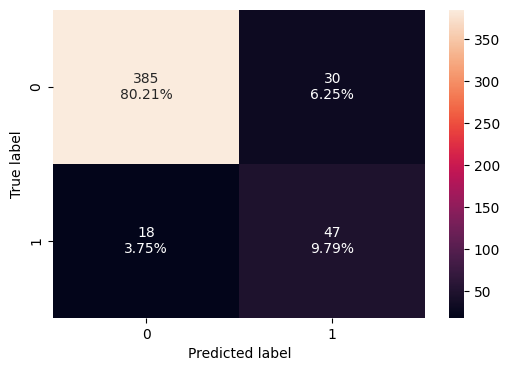

In [ ]:
#Calculating different metrics
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned,X_train,y_train)
print("Training performance:\n",rf_tuned_model_train_perf)
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned,X_test,y_test)
print("Testing performance:\n",rf_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_tuned,X_test,y_test)

* The overfitting has reduced significantly and the model performance has improved.
* The test recall and test f1-score have increased.

### Bagging Classifier

   Accuracy  Recall  Precision        F1
0  0.983021   0.875        1.0  0.933333
   Accuracy    Recall  Precision        F1
0  0.916667  0.584615   0.745098  0.655172


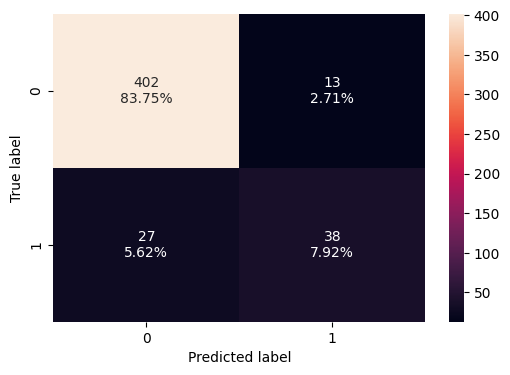

In [ ]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
print(bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf=model_performance_classification_sklearn(bagging_classifier,X_test,y_test)
print(bagging_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier,X_test,y_test)

* Bagging classifier is overfitting the training data.
* Let's try hyperparameter tuning and see if the model performance improves.

### Hyperparameter Tuning

In [ ]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1],
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.9, n_estimators=50,
                  random_state=1)

   Accuracy    Recall  Precision      F1
0  0.999106  0.993421        1.0  0.9967
   Accuracy    Recall  Precision        F1
0   0.90625  0.461538       0.75  0.571429


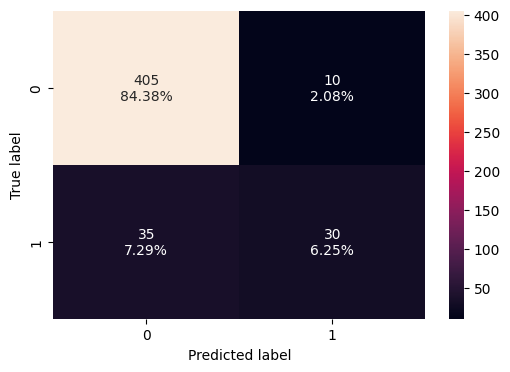

In [ ]:
#Calculating different metrics
bagging_estimator_tuned_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train)
print(bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test)
print(bagging_estimator_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned,X_test,y_test)

* Surprisingly, the model performance has decreased after hyperparameter tuning.
* Let's try now try boosting models.

## Boosting - Model Building and Hyperparameter Tuning

### AdaBoost Classifier

   Accuracy    Recall  Precision        F1
0  0.903485  0.453947   0.734043  0.560976
   Accuracy    Recall  Precision        F1
0  0.877083  0.338462   0.578947  0.427184


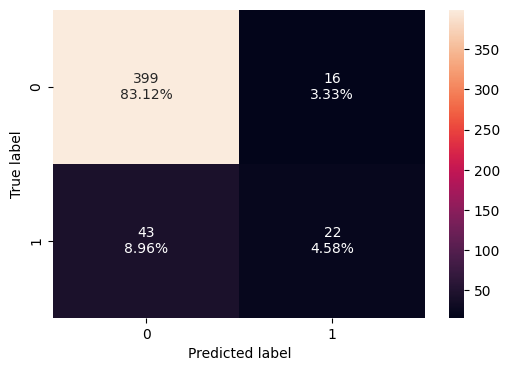

In [ ]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier,X_train,y_train)
print(ab_classifier_model_train_perf)
ab_classifier_model_test_perf=model_performance_classification_sklearn(ab_classifier,X_test,y_test)
print(ab_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

* Adaboost is giving more generalized performance than previous models but the test f1-score is too low.

### Hyperparameter Tuning

In [58]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for estimator
    "estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=np.float64(1.4000000000000001),
                   n_estimators=np.int64(70), random_state=1)

   Accuracy    Recall  Precision        F1
0  0.971403  0.828947   0.954545  0.887324
   Accuracy    Recall  Precision        F1
0     0.875  0.415385    0.55102  0.473684


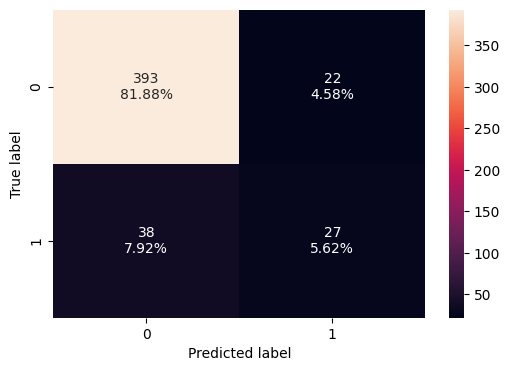

In [57]:
#Calculating different metrics
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned,X_train,y_train)
print(abc_tuned_model_train_perf)
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned,X_test,y_test)
print(abc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

* The model performance has increased slightly but the model has started to overfit the training data.

### Gradient Boosting Classifier

Training performance:
    Accuracy    Recall  Precision     F1
0  0.969616  0.782895   0.991667  0.875
Testing performance:
    Accuracy    Recall  Precision        F1
0   0.90625  0.492308   0.727273  0.587156


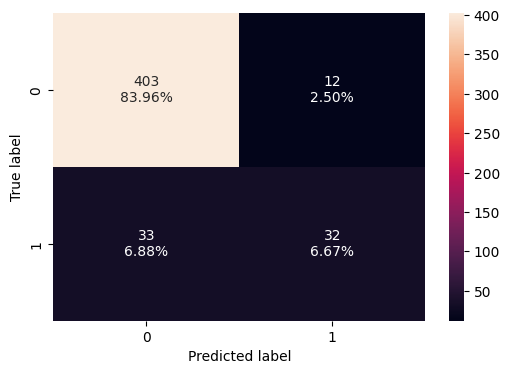

In [59]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier,X_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier,X_test,y_test)
print("Testing performance:\n",gb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

* The gradient boosting classifier is overfitting the training data.

### Hyperparameter Tuning

In [60]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=250, random_state=1,
                           subsample=0.8)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.994638  0.960526        1.0  0.979866
Testing performance:
    Accuracy    Recall  Precision        F1
0    0.9125  0.553846   0.734694  0.631579


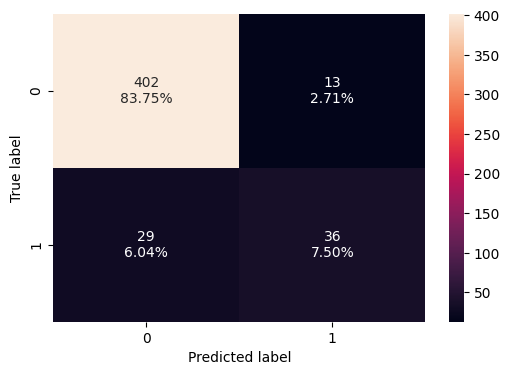

In [61]:
#Calculating different metrics
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

* There is not much difference in the model performance after hyperparameter tuning.

### XGBoost Classifier

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy  Recall  Precision        F1
0   0.91875     0.6       0.75  0.666667


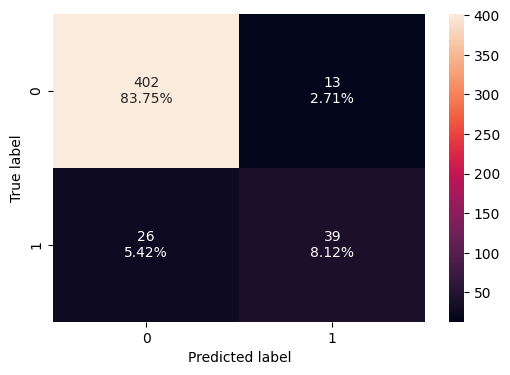

In [62]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
xgb_classifier_model_train_perf=model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
print("Training performance:\n",xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf=model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
print("Testing performance:\n",xgb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

* xgboost classifier is overfitting the training data.
* Let's try hyperparameter tuning and see if the model performance improves.  

### Hyperparameter Tuning

In [63]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.7, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, ...)

Training performance:
    Accuracy    Recall  Precision        F1
0   0.96336  0.986842   0.793651  0.879765
Testing performance:
    Accuracy    Recall  Precision        F1
0    0.8875  0.707692   0.567901  0.630137


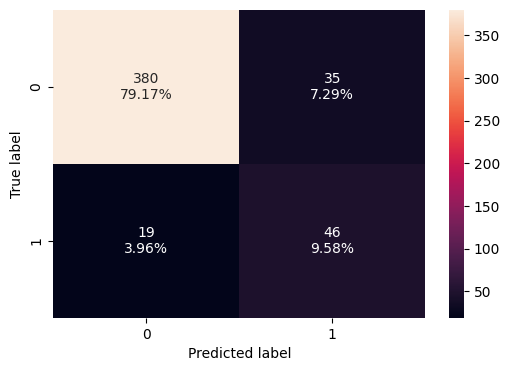

In [64]:
#Calculating different metrics
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
print("Training performance:\n",xgb_tuned_model_train_perf)
xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned,X_test,y_test)
print("Testing performance:\n",xgb_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

* The overfitting has reduced slightly but there is not much difference in the model performance.

## Stacking Model

In [65]:
estimators = [('Random Forest',rf_tuned), ('Gradient Boosting',gbc_tuned), ('Decision Tree',dtree_estimator)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.18,
                                                                     1: 0.82},
                                                       max_depth=np.int64(10),
                                                       min_samples_leaf=np.int64(6),
                                                       min_samples_split=np.int64(17),
                                                       n_estimators=np.int64(40),
                                                       oob_score=True,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.8,
                                                           n_esti...
                                                 feature_weights=None,
                                                 gamma=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.05,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=50, n_jobs=None,
                                                 num_parallel_tree=None, ...))

Training performance:
    Accuracy    Recall  Precision        F1
0  0.922252  0.980263   0.639485  0.774026
Testing performance:
    Accuracy  Recall  Precision        F1
0   0.84375     0.8    0.45614  0.581006


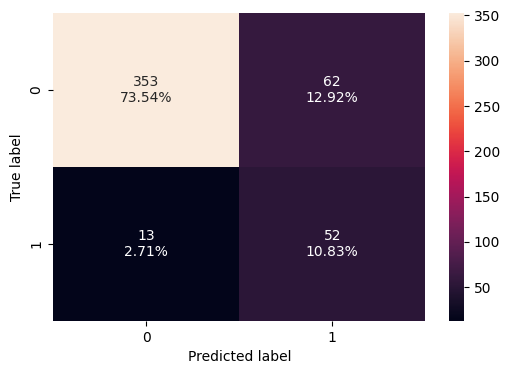

In [66]:
#Calculating different metrics
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
print("Training performance:\n",stacking_classifier_model_train_perf)
stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
print("Testing performance:\n",stacking_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

* The stacking classifier is giving a similar performance as compared to XGBoost with slightly less overfitting.
* The confusion matrix shows that the model can identify the majority of premium quality wines but it is better at identifying non-premium quality wines.

## Comparing all models

In [67]:
# training performance comparison

models_train_comp_df = pd.concat(
    [d_tree_model_train_perf.T,dtree_estimator_model_train_perf.T,rf_estimator_model_train_perf.T,rf_tuned_model_train_perf.T,
     bagging_classifier_model_train_perf.T,bagging_estimator_tuned_model_train_perf.T,ab_classifier_model_train_perf.T,
     abc_tuned_model_train_perf.T,gb_classifier_model_train_perf.T,gbc_tuned_model_train_perf.T,xgb_classifier_model_train_perf.T,
    xgb_tuned_model_train_perf.T,stacking_classifier_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.853441,1.0,0.935657,0.983021,0.999106,0.903485,0.971403,0.969616,0.994638,1.0,0.963360,0.922252
Recall,1.0,0.809211,1.0,0.881579,0.875000,0.993421,0.453947,0.828947,0.782895,0.960526,1.0,0.986842,0.980263
Precision,1.0,0.476744,1.0,0.712766,1.000000,1.000000,0.734043,0.954545,0.991667,1.000000,1.0,0.793651,0.639485
F1,1.0,0.600000,1.0,0.788235,0.933333,0.996700,0.560976,0.887324,0.875000,0.979866,1.0,0.879765,0.774026


In [68]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [d_tree_model_test_perf.T,dtree_estimator_model_test_perf.T,rf_estimator_model_test_perf.T,rf_tuned_model_test_perf.T,
     bagging_classifier_model_test_perf.T,bagging_estimator_tuned_model_test_perf.T,ab_classifier_model_test_perf.T,
     abc_tuned_model_test_perf.T,gb_classifier_model_test_perf.T,gbc_tuned_model_test_perf.T,xgb_classifier_model_test_perf.T,
    xgb_tuned_model_test_perf.T,stacking_classifier_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.887500,0.789583,0.918750,0.900000,0.916667,0.906250,0.877083,0.875000,0.906250,0.912500,0.918750,0.887500,0.843750
Recall,0.600000,0.707692,0.492308,0.723077,0.584615,0.461538,0.338462,0.415385,0.492308,0.553846,0.600000,0.707692,0.800000
Precision,0.582090,0.359375,0.842105,0.610390,0.745098,0.750000,0.578947,0.551020,0.727273,0.734694,0.750000,0.567901,0.456140
F1,0.590909,0.476684,0.621359,0.661972,0.655172,0.571429,0.427184,0.473684,0.587156,0.631579,0.666667,0.630137,0.581006


* The majority of the models are overfitting the training data in terms of f1-score.
* The bagging classifier is giving the highest f1-score on the test data but is overfitting the training data.
* The tuned random forest has given the second-highest test f1-score and is giving a more generalized performance as compared to the bagging classifier.

### Feature importance of Tuned Random Forest

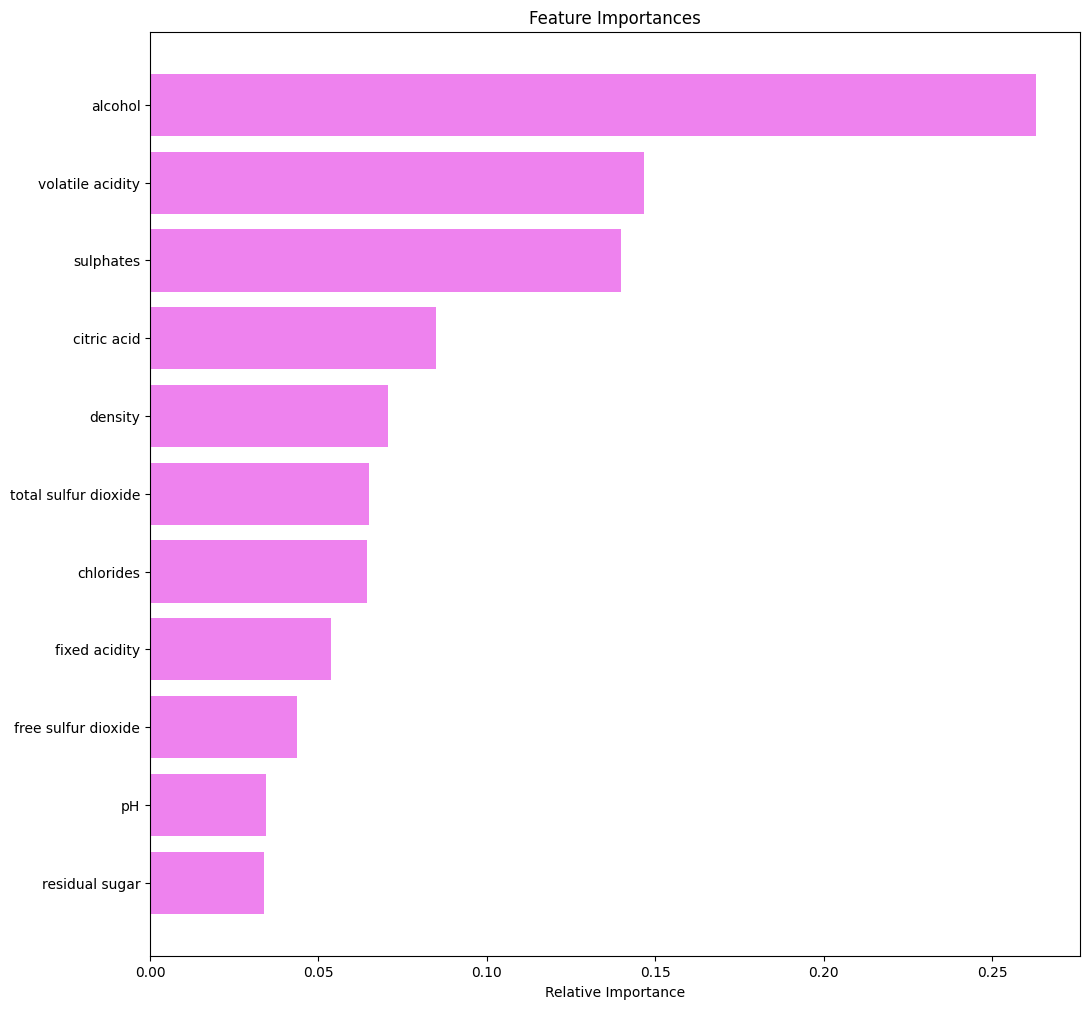

In [69]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Alcohol is the most important feature in identifying premium quality wine followed by sulfates and volatile acidity.

## Conclusions and Recommendations

- Based on our analysis, we can say that the premium quality wine has the following features in comparison to the non-premium quality wine:
    - Higher concentration of alcohol.
    - A fair and higher concentration of sulfates. Fair indicates a smaller range of values or less extreme values.
    - Less volatile acidity.
    - Higher fixed acidity.
    - Higher citric acid concentration.
    - A fair and lower concentration of total sulfur dioxide and free sulfur dioxide.
    - Lower concentration of chlorides.
    - Lesser density.
    - A fair pH level i.e. neither very acidic nor very less acidic.
- The company should be more precise with the concentration and level of alcohol, volatile acidity, and sulfates as these are the most important factors in determining the quality of wines. For example, the common alcohol level for premium quality wine should be between 11-13%.
- Once the desired performance is achieved from the model, the company can use it to identify the premium quality wines for new production. This would help to reduce the cost and increase the efficiency of the process.

In [70]:
%%shell
jupyter nbconvert --to html '/content/drive/My Drive/UTA - AIML/Machine_Learning/Essemble/Case_Study_WineQuality_Prediction_V3.ipynb'

[NbConvertApp] WARNING | pattern '/content/drive/My Drive/UTA - AIML/Machine_Learning/Essemble/Case_Study_WineQuality_Prediction_V3.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions

CalledProcessError: Command 'jupyter nbconvert --to html '/content/drive/My Drive/UTA - AIML/Machine_Learning/Essemble/Case_Study_WineQuality_Prediction_V3.ipynb'
' returned non-zero exit status 255.

___